In [1]:
#First, we need to import dataset from drive
from google.colab import drive
drive.mount('/content/drive')
# Authorization is required for the drive to be mounted

Mounted at /content/drive


Referred from https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive

In [2]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets
opendatasets.download("https://www.kaggle.com/datasets/maricinnamon/caltech101-airplanes-motorbikes-schooners")
# The above link is to provide dataset from kaggle so that we can import the data into our drive
# We have to provide our Kaggle credentials and key to provide access and hence data is downloaded

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shreyamalraju
Your Kaggle Key: ··········


100%|██████████| 14.5M/14.5M [00:00<00:00, 36.8MB/s]


Referred from https://pypi.org/project/opendatasets/0.0.105/

In [4]:
import random
import datetime
import cv2
import imutils
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import LabelBinarizer

In [5]:
# define variables
data = []
labels_of_images = []
path_of_images = []
# define path for the dataset
location ="/content/drive/MyDrive/caltech101_classification/"
# define the classes to classify
classes = ["Motorbikes", "airplanes", "schooner"]

In [6]:
# code for counting the number of classes based on labels
def count_of_classes(labels_of_images, class_name):
    counter = 0
    for l in labels_of_images:
        if l == class_name:
            counter += 1
    return counter

In [7]:
for c in classes:
    list_of_images = [] 
    
    path_new = location + "/" + c + "/"
    print(path_new)
    for image in os.listdir(path_new): 
        if (image.endswith(".jpg")):
            list_of_images.append(image)
    list_of_images = sorted(list_of_images)  
    for img in list_of_images:
        label = c
        
        image_path = os.path.sep.join([location, c, img])
        image = cv2.imread(image_path)
        (h, w) = image.shape[:2]
        
        image = load_img(image_path, target_size=(224, 224))
        image = img_to_array(image)
        
        data.append(image)
        labels_of_images.append(label)
        path_of_images.append(image_path)

/content/drive/MyDrive/caltech101_classification//Motorbikes/
/content/drive/MyDrive/caltech101_classification//airplanes/
/content/drive/MyDrive/caltech101_classification//schooner/


Referred from https://www.kaggle.com/code/maricinnamon/multiclass-classification-caltech101-tensorflow

In [8]:
count_of_motorbikes = count_of_classes(labels_of_images, "Motorbikes")
count_of_airplanes = count_of_classes(labels_of_images, "airplanes")
count_of_schooners = count_of_classes(labels_of_images, "schooner")

max_number = max(count_of_motorbikes, count_of_airplanes, count_of_schooners)

In [9]:
def perform_rotation(img):
    (h, w) = img.shape[:2]
    rotate_val = random.uniform(-5, 5)
    center = (w / 2, h / 2)  
    M = cv2.getRotationMatrix2D(center, 
                                rotate_val, 
                                scale=1)
    
    rotated_image = cv2.warpAffine(img.copy(), 
                                M, 
                                (w, h))
    return rotated_image

def perform_scaling(img):
    scale_val = random.uniform(0.8, 1.2)
    scaled_image = cv2.resize(img.copy(), 
                           None, 
                           fx=scale_val, 
                           fy=scale_val)
    
    return scaled_image

Referred from https://www.kaggle.com/code/maricinnamon/multiclass-classification-caltech101-tensorflow

In [10]:
# augment the schooner class as we have very less images from that class
def data_augmentation(counter, max_number, class_name):
    
    while counter < max_number:
        
        
        for img in data:
            
            
            if counter < max_number:
                
                newImg = img.copy()
                newImg = perform_scaling(newImg)
                
                
                cv2.imwrite("newImg.jpg", newImg)
                
                
                newImg = load_img("newImg.jpg", target_size=(224, 224))
                newImg = img_to_array(newImg)
                
                
                os.remove("newImg.jpg")
                
                
                data.append(newImg)
                labels_of_images.append(class_name)
                path_of_images.append(image_path)
                
                
                counter = count_of_classes(labels_of_images, class_name)
            else:
                break

            
            if counter < max_number:
                newImg = img.copy()
                newImg = perform_rotation(newImg)
                
               
                cv2.imwrite("newImg.jpg", newImg)
                
                
                newImg = load_img("newImg.jpg", target_size=(224, 224))
                newImg = img_to_array(newImg)
                
               
                os.remove("newImg.jpg")
                
                
                data.append(newImg)
                labels_of_images.append(class_name)
                path_of_images.append(image_path)
                
                
                counter = count_of_classes(labels_of_images, class_name)
            else:
                break

Referred from https://www.kaggle.com/code/maricinnamon/multiclass-classification-caltech101-tensorflow

In [11]:
data_augmentation(count_of_motorbikes, max_number, "Motorbikes")
data_augmentation(count_of_schooners, max_number, "schooner")

In [12]:
count_of_motorbikes = count_of_classes(labels_of_images, "Motorbikes")
count_of_airplanes = count_of_classes(labels_of_images, "airplanes")
count_of_schooners = count_of_classes(labels_of_images, "schooner")



In [13]:
data = np.array(data, dtype="float32") / 255.0

In [14]:
labels_of_images = np.array(labels_of_images)
path_of_images = np.array(path_of_images)

In [15]:
lb = LabelBinarizer()
labels_of_images = lb.fit_transform(labels_of_images)

In [16]:
split = train_test_split(data,
                         labels_of_images,
                         path_of_images,
                         test_size=0.05,
                         random_state=42)

In [17]:
(trainImages, testImages) = split[:2]
(trainLabels, testLabels) = split[2:4]
(trainPaths, testPaths) = split[4:]

In [18]:
f = open("testing_multiclass.txt", "w")
f.write("\n".join(testPaths))
f.close()

In [19]:
vgg = VGG16(weights="imagenet",
            include_top=False,
            input_tensor=Input(shape=(224, 224, 3)))

58889256/58889256 [==============================] - 1s 0us/step


In [20]:
vgg.trainable = False

In [21]:
flatten = vgg.output
flatten = Flatten()(flatten)

In [22]:
softmaxHead = Dense(512, activation="relu")(flatten)
softmaxHead = Dropout(0.5)(softmaxHead)
softmaxHead = Dense(512, activation="relu")(flatten)
softmaxHead = Dropout(0.5)(softmaxHead)
softmaxHead = Dense(512, activation="relu")(softmaxHead)
softmaxHead = Dropout(0.5)(softmaxHead)

softmaxHead = Dense(len(lb.classes_), 
                    activation="softmax", 
                    name="class_label")(softmaxHead)

Referred from : https://www.kaggle.com/code/maricinnamon/multiclass-classification-caltech101-tensorflow

Modification : Added extra layer

In [24]:
model = Model(
    inputs=vgg.input,
    outputs=(softmaxHead))

In [25]:
learning_rate = 1e-4
epochs = 40
batch_size = 32

Referred from : https://www.kaggle.com/code/maricinnamon/multiclass-classification-caltech101-tensorflow

Modification : changed hyperparameters

In [26]:
losses = {
    "class_label": "categorical_crossentropy",
}
trainTargets = {
    "class_label": trainLabels,
}
testTargets = {
    "class_label": testLabels,
}

In [27]:
best_model = "model.h5"

model_checkpoint_callback = ModelCheckpoint(
    filepath=best_model,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

Referred from : https://www.kaggle.com/code/maricinnamon/multiclass-classification-caltech101-tensorflow

In [28]:
opt = Adam(learning_rate)

model.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"])

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [29]:
H = model.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[model_checkpoint_callback],
    verbose=1)

Epoch 1/40
72/72 [==============================] - 15s 105ms/step - loss: 0.6324 - accuracy: 0.7118 - val_loss: 0.3002 - val_accuracy: 0.8917
Epoch 2/40
72/72 [==============================] - 6s 84ms/step - loss: 0.3856 - accuracy: 0.8241 - val_loss: 0.2685 - val_accuracy: 0.8583
Epoch 3/40
72/72 [==============================] - 6s 85ms/step - loss: 0.3232 - accuracy: 0.8570 - val_loss: 0.2485 - val_accuracy: 0.8833
Epoch 4/40
72/72 [==============================] - 7s 91ms/step - loss: 0.2787 - accuracy: 0.8728 - val_loss: 0.1827 - val_accuracy: 0.9333
Epoch 5/40
72/72 [==============================] - 6s 85ms/step - loss: 0.2682 - accuracy: 0.8807 - val_loss: 0.1809 - val_accuracy: 0.9083
Epoch 6/40
72/72 [==============================] - 6s 85ms/step - loss: 0.2095 - accuracy: 0.9075 - val_loss: 0.1482 - val_accuracy: 0.9167
Epoch 7/40
72/72 [==============================] - 6s 85ms/step - loss: 0.1746 - accuracy: 0.9241 - val_loss: 0.1590 - val_accuracy: 0.9250
Epoch 8/40


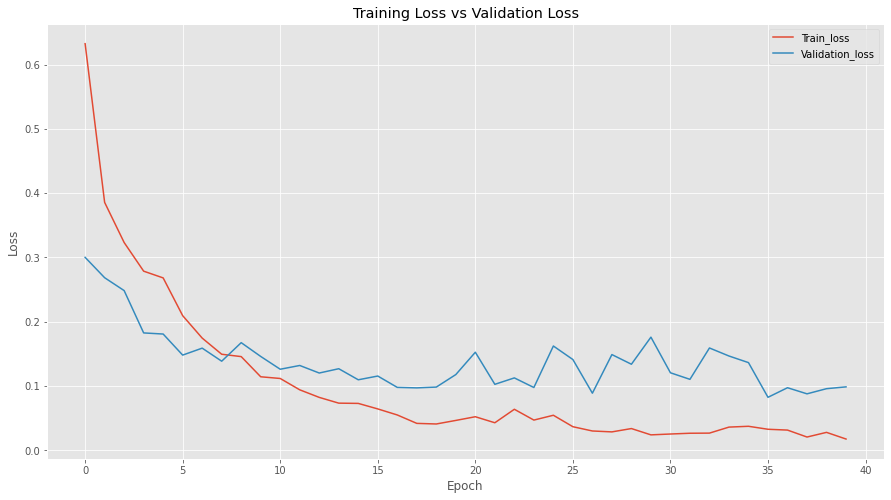

In [30]:
lossNames = ["loss"]

N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))

plt.title("Training Loss vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(N, H.history["loss"], label="Train_loss")
plt.plot(N, H.history["val_loss"], label="Validation_loss")
plt.legend()

plt.show()

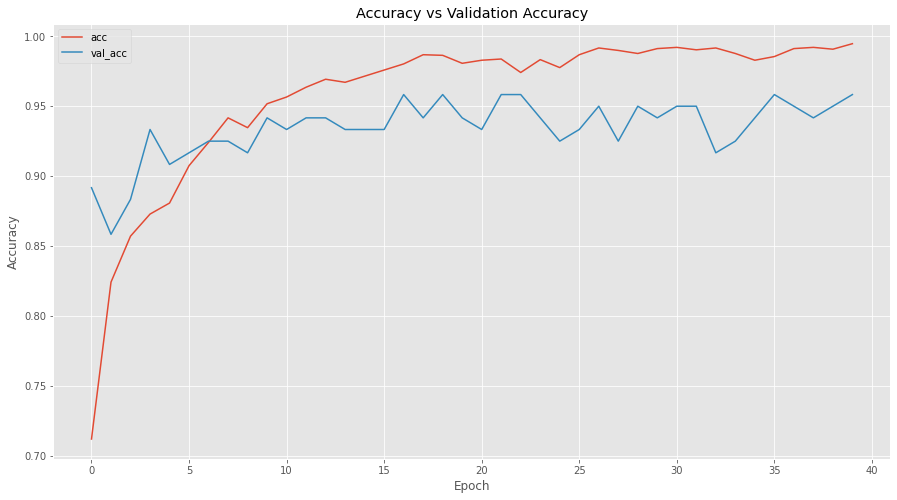

In [31]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))

plt.plot(N, H.history["accuracy"], label="acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")

plt.title("Accuracy vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [32]:
path = "testing_multiclass.txt"
files = open(path).read().strip().split("\n")
path_of_images = []

for f in files:
    path_of_images.append(f)
model = load_model("./model.h5")

1/1 [==============================] - 0s 340ms/step
class label =  schooner


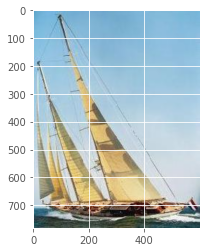

1/1 [==============================] - 0s 15ms/step
class label =  schooner


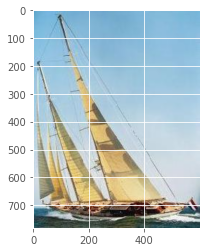

1/1 [==============================] - 0s 15ms/step
class label =  airplanes


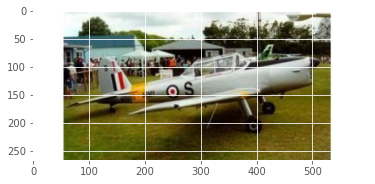

1/1 [==============================] - 0s 16ms/step
class label =  schooner


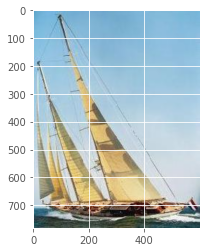

1/1 [==============================] - 0s 16ms/step
class label =  schooner


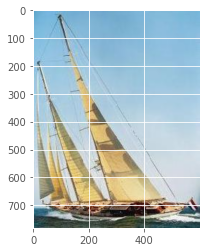

1/1 [==============================] - 0s 15ms/step
class label =  Motorbikes


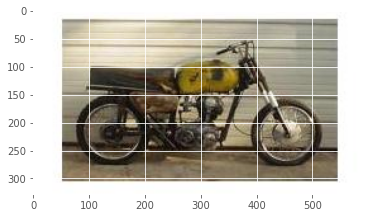

1/1 [==============================] - 0s 16ms/step
class label =  airplanes


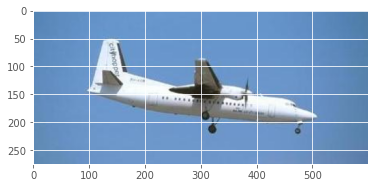

1/1 [==============================] - 0s 16ms/step
class label =  schooner


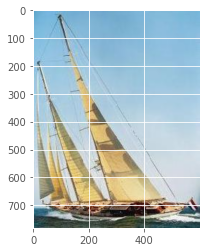

1/1 [==============================] - 0s 15ms/step
class label =  airplanes


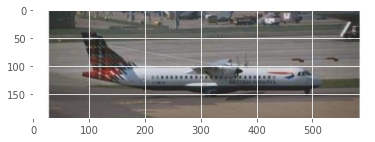

1/1 [==============================] - 0s 16ms/step
class label =  airplanes


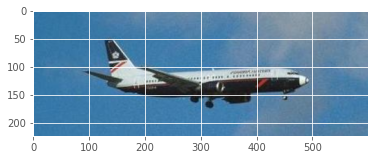

1/1 [==============================] - 0s 16ms/step
class label =  schooner


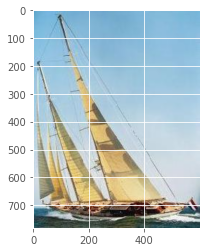

In [33]:
c = 0

for igpath in path_of_images:


    image = load_img(igpath, target_size=(224, 224))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    
    (pred) = model.predict(image)
    i = np.argmax(pred, axis=1)
    label = lb.classes_[i][0]

    image = cv2.imread(igpath)
    image = imutils.resize(image, width=600)
    (h, w) = image.shape[:2]

    print("class label = ", label)
    imgplot = plt.imshow(cv2.cvtColor(image, 
                                      cv2.COLOR_BGR2RGB).astype('uint8'))
    plt.show()
    
  
    c += 1
   
    if (c > 10):
        break

References
1. https://www.kaggle.com/code/maricinnamon/multiclass-classification-caltech101-tensorflow

2. https://www.mathworks.com/help/deeplearning/ref/vgg16.html;jsessionid=c9b7423621bb9e3cf9c8d63d2cec

3. https://keras.io/guides/sequential_model/

4. https://www.tensorflow.org/learn#build-models